#### Setting up LLM Model

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.3-70b-versatile")

#### Creating State Schema and StateGraph

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image ,display

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str

In [3]:
def generate_story(state:State):
    msg=llm.invoke(f"Write a one sentence story premise about {state["topic"]}")
    return {"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improved_story(state:State):
    msg=llm.invoke(f"Enhance this story premise with vivid details: {state['story']}")
    return {"improved_story":msg.content}

def polish_story(state:State):
    msg=llm.invoke(f"Add an unexpected twist to this story premise: {state['improved_story']}")
    return {"final_story":msg.content}

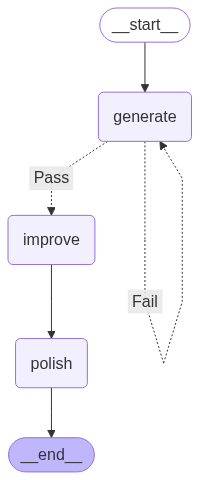

In [4]:
graph=StateGraph(State)
graph.add_node("generate",generate_story)
graph.add_node("improve", improved_story)
graph.add_node("polish", polish_story)

graph.add_edge(START,"generate")
graph.add_conditional_edges("generate",check_conflict,{"Pass":"improve","Fail":"generate"})
graph.add_edge("improve","polish")
graph.add_edge("polish",END)

compiled_graph = graph.compile()

graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [6]:
state={"topic":"Space Exploration"}
result = compiled_graph.invoke(state)
result

{'topic': 'Space Exploration',
 'story': "As the last hope for humanity's survival, the spaceship Aurora embarks on a perilous journey to a distant planet, only to discover that they are not alone in the universe and that their new home holds secrets and dangers beyond their wildest imagination.",
 'improved_story': 'In the year 2256, as the ravaged Earth teetered on the brink of collapse, the spaceship Aurora, a marvel of human ingenuity, stood as the last bastion of hope for the survival of humanity. This gargantuan vessel, measuring over a mile in length, was a self-sustaining ecosystem, equipped with cutting-edge technology and a crew of 5,000 handpicked individuals, each possessing unique skills and expertise. The ship\'s hull, a latticework of interlocking steel and titanium, glistened with a metallic sheen, as if infused with the very essence of the stars it was destined to traverse.\n\nAs the Aurora broke free of Earth\'s gravitational shackles, it embarked on a perilous 200-ye

In [7]:
print("Improved Story\n")
print(result["improved_story"])
print("\nPolished Story\n")
print(result["final_story"])

Improved Story

In the year 2256, as the ravaged Earth teetered on the brink of collapse, the spaceship Aurora, a marvel of human ingenuity, stood as the last bastion of hope for the survival of humanity. This gargantuan vessel, measuring over a mile in length, was a self-sustaining ecosystem, equipped with cutting-edge technology and a crew of 5,000 handpicked individuals, each possessing unique skills and expertise. The ship's hull, a latticework of interlocking steel and titanium, glistened with a metallic sheen, as if infused with the very essence of the stars it was destined to traverse.

As the Aurora broke free of Earth's gravitational shackles, it embarked on a perilous 200-year journey to the distant planet of Kepler-62f, a celestial body located over 1,200 light-years away. This enigmatic world, with its swirling clouds of iridescent gases and vast oceans, had been deemed the most promising candidate for human habitation. The ship's crew, led by the indomitable Captain Jaxon,